In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('data.csv') # renamed

In [1]:
# df.head()

In [25]:
# changed col names removed extra, rewrote on copy

# df = df.rename(columns={'canonical_name':'city name', 'order_date':'date', 'acq_count':'count','Unnamed: 0':'index'})  # rename cols
# df = df.drop(['n_acq_wt_voucher','n_distinct_restaurants'],axis=1)  # drop extra cols
# df['city name'] = df['city name'].str.replace(',Sweden', '')  # remove country name
# df["date"] = pd.to_datetime(df["date"],format='%Y-%m-%d')  # date col into pd.datetime 
# df.to_csv('swed.csv')  # write to file

In [41]:
df.dtypes

index                 int64
city name            object
date         datetime64[ns]
count                 int64
dtype: object

In [2]:
# df.head()

In [110]:
test = df.sort_values(by='date')

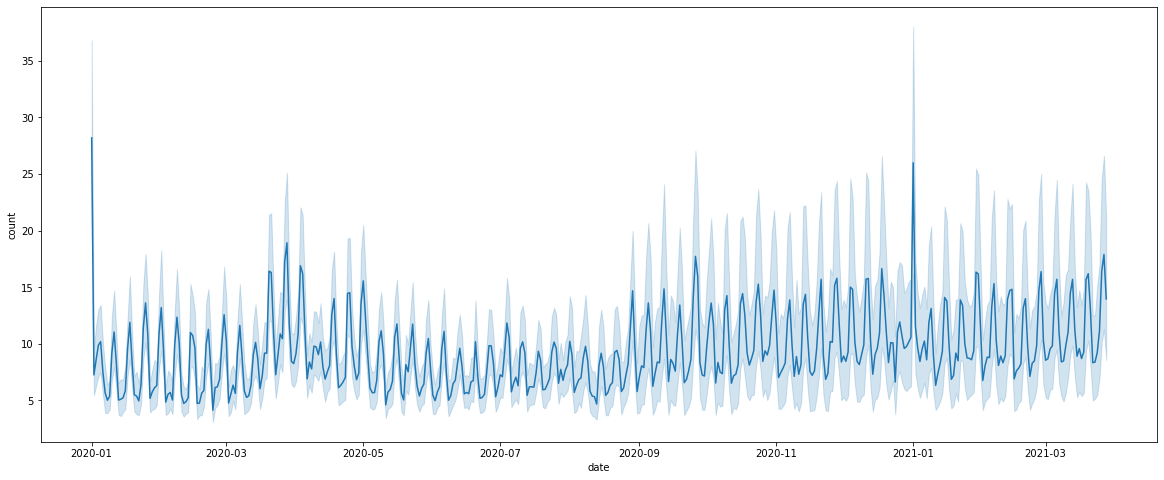

In [111]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=test['date'], y=df['count'])

In [105]:
df2 = pd.read_csv(      # set date as index
    'data.csv', 
    parse_dates=['date'], 
    index_col=['date']
)
df2 = df2.drop(['Unnamed: 0','city name','index'],axis=1) # drop extra
df2 = df2.sort_index()

weekly = df2
monthly = df2

weekly = weekly['count'].resample(rule="W-MON").sum() # resampling for easier plot drawing
monthly = monthly['count'].resample(rule="M").sum()



# df2.to_csv('test.csv') # test saved 
# df2.head()
weekly

date
2020-01-06    9247
2020-01-13    5564
2020-01-20    6030
2020-01-27    6752
2020-02-03    6598
              ... 
2021-03-01    8602
2021-03-08    8813
2021-03-15    9627
2021-03-22    9547
2021-03-29    9575
Freq: W-MON, Name: count, Length: 65, dtype: int64

In [66]:
df[df['date'] <= '2020-01-06']['count'].sum() # checking if correcty resampled ( this time was correct campared to df weekly )

9247

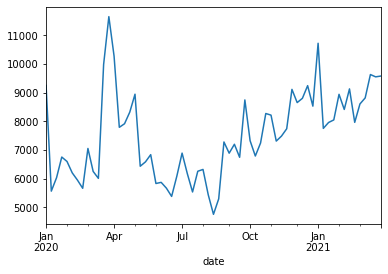

In [106]:
weekly.plot.line()

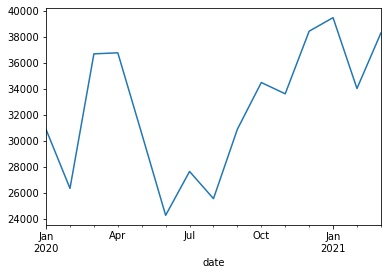

In [107]:
monthly.plot.line()

In [89]:
df[df['date'] >= '2021-01-01']['count'].sum()  # checking again

111838

In [109]:
monthly.resample(rule="M").sum()  # checking again

date
2020-01-31    30884
2020-02-29    26353
2020-03-31    36706
2020-04-30    36785
2020-05-31    30566
2020-06-30    24281
2020-07-31    27655
2020-08-31    25564
2020-09-30    30909
2020-10-31    34499
2020-11-30    33632
2020-12-31    38448
2021-01-31    39492
2021-02-28    34040
2021-03-31    38306
Freq: M, Name: count, dtype: int64